In [1]:
import numpy as np
import pandas as pd
import yaml
np.random.seed(42)
import os
from resum.polynomial_chaos_expansion import PCEMultiFidelityModelVisualizer
import matplotlib.pyplot as plt
import arviz as az

Compiledir: compiledir=./pytensor_cache,mode=FAST_COMPILE,optimizer=None


In [ ]:
with open("../binary-black-hole/settings.yaml", "r") as f:
    config_file = yaml.safe_load(f)

version       = config_file["path_settings"]["version"]
path_out_cnp  = config_file["path_settings"]["path_out_cnp"]
path_out_pce = config_file["path_settings"]["path_out_pce"]
file_in=f'{path_out_cnp}/cnp_{version}_output.csv'


In [3]:

if not os.path.exists(path_out_pce):
   os.makedirs(path_out_pce)

# Set parameter name/x_labels -> needs to be consistent with data input file
x_labels        = config_file["simulation_settings"]["theta_headers"]
y_label_cnp     = 'y_cnp'
y_err_label_cnp = 'y_cnp_err'
y_label_sim     = 'y_raw'

# Set parameter boundaries
xmin = config_file["simulation_settings"]["theta_min"]
xmax = config_file["simulation_settings"]["theta_max"]
x_fixed = config_file["simulation_settings"]["theta_fixed"]
parameters={}
for i,x in enumerate(x_labels):
   parameters[x]=[xmin[i],xmax[i]]


In [7]:
pce_visualizer= PCEMultiFidelityModelVisualizer(fidelities=["lf"],parameters=parameters, degree=1)
pce_visualizer.read_trace(path_out_pce,version)

Warring: No trace has been given. Please run "read_trace(path_to_trace)"


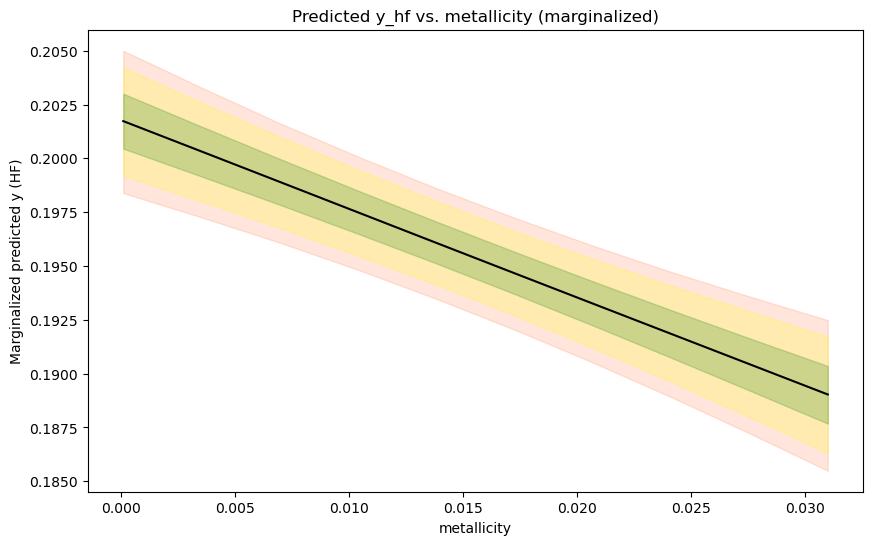

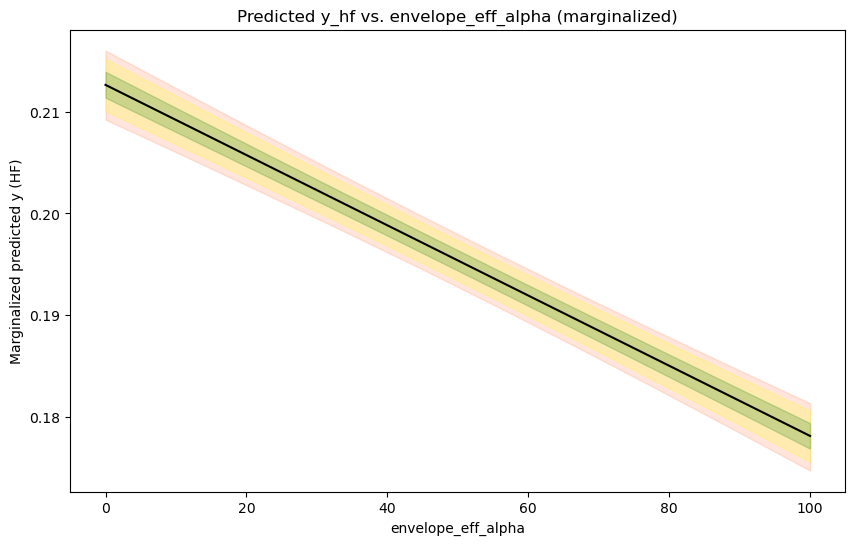

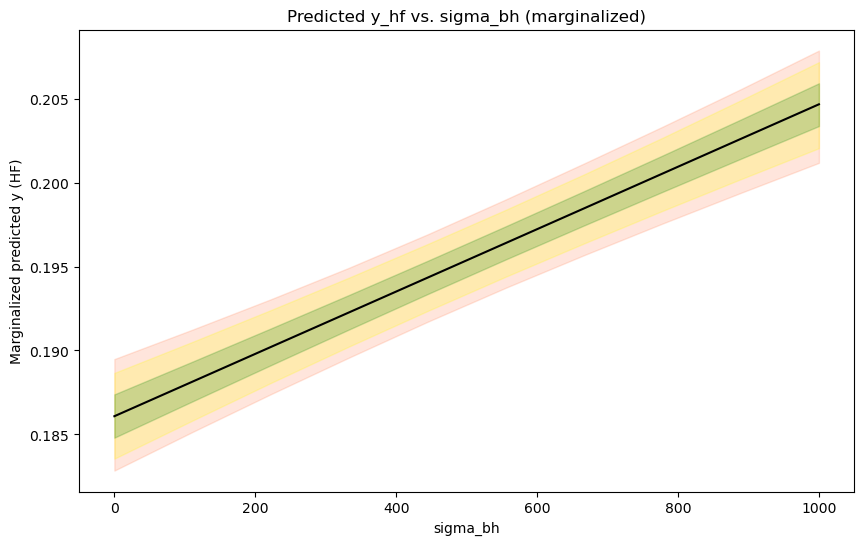

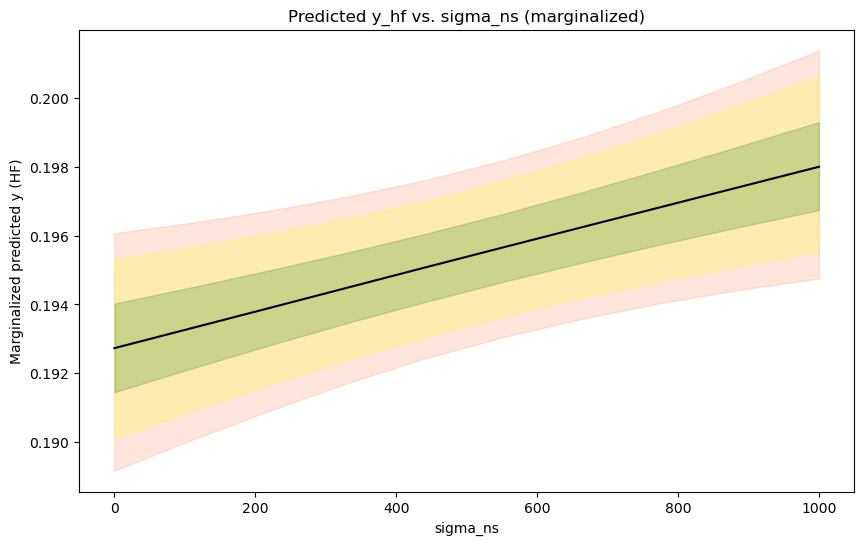

In [8]:
grid_steps=10
for i in range(len(parameters.keys())):
    pce_visualizer.get_marginalized(i,grid_steps)

In [ ]:
#data_test=pd.read_csv("{resum_path}/baseline_models_comparison/in/hf_validation_data_v1.2.csv")
#row_hf_test=data_test.index[data_test['fidelity'] == 1]
#row_lf_test=data_test.index[data_test['fidelity'] == 0]
#x_test = data_test.loc[row_hf_test][x_labels].to_numpy()
#y_test = data_test.loc[row_hf_test][y_label_sim].to_numpy()
#test_data = {"hf": [x_test,y_test]}

In [ ]:
#multi_fidelity_model.evaluate_mse(x_test, y_test)

In [ ]:
#multi_fidelity_model.plot_validation(x_test,y_test)

In [ ]:

#multi_fidelity_model.validate_coverage(x_test,y_test)